In [1]:
import datetime
import numpy as np
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc
import pandas as pd
plt.rcParams["patch.force_edgecolor"] = True
# plt.rc('axes',axisbelow=True)
plt.rcParams['axes.axisbelow'] = True


def dateRange(beginDate, endDate):
    dates = []
    dt = datetime.datetime.strptime(beginDate, "%Y-%m-%d")
    date = beginDate[:]
    while date <= endDate:
        dates.append(date)
        dt = dt + datetime.timedelta(1)
        date = dt.strftime("%Y-%m-%d")
    return dates


mydata = pd.DataFrame(dict(day=dateRange("2016-01-01", "2016-02-01"),
                           Price=-np.sort(-np.random.normal(loc=30, scale=10, size=32)) +
                           np.random.normal(loc=3, scale=3, size=32)))

mydata['day'] = pd.to_datetime(mydata['day'], format="%Y/%m/%d")
mydata


,day,Price
0,2016-01-01,52.196562
1,2016-01-02,51.344107
2,2016-01-03,48.327018
3,2016-01-04,40.241981
4,2016-01-05,39.048213
5,2016-01-06,39.437251
6,2016-01-07,40.656891
7,2016-01-08,37.915648
8,2016-01-09,44.253001
9,2016-01-10,35.318269


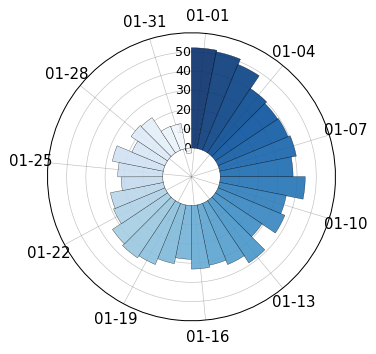

In [2]:
n_row = mydata.shape[0]
angle = np.arange(0, 2*np.pi, 2*np.pi/n_row)
radius = np.array(mydata.Price)

fig = figure(figsize=(4, 4), dpi=90)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)

# 方法用于设置角度偏离,参数值为弧度值数值
ax.set_theta_offset(np.pi/2-np.pi/n_row)
# 当set_theta_direction的参数值为1,'counterclockwise'或者是'anticlockwise'的时候，正方向为逆时针；
# 当set_theta_direction的参数值为-1或者是'clockwise'的时候，正方向为顺时针；
ax.set_theta_direction(-1)
# 方法用于设置极径标签显示位置,参数为标签所要显示在的角度
ax.set_rlabel_position(360-180/n_row)

cmap = cm.get_cmap('Blues_r', n_row)
color = [colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

plt.bar(angle, radius, color=color, alpha=0.9,
        width=0.2, align="center", linewidth=0.25)

plt.ylim(-15, 60)
index = np.arange(0, n_row, 3)
plt.xticks(angle[index], labels=[x.strftime('%m-%d')
                                 for x in mydata.day[index]], size=12)
plt.yticks(np.arange(0, 60, 10), verticalalignment='center',
           horizontalalignment='right')


plt.grid(which='major', axis="x", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis="y", linestyle='-',
         linewidth='0.5', color='gray', alpha=0.5)

# fig.savefig('径向柱图.pdf')
